In [14]:
#import thu vien
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image





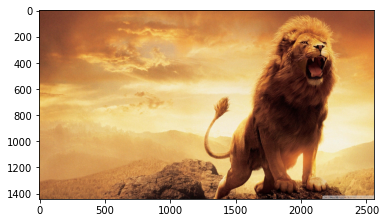

In [15]:
#hien thi anh
raw_img=Image.open('C:/Users/DELL/Downloads/hinh sampling1.jpg')
plt.imshow(raw_img)
img = np.array(raw_img)
img_height, img_width = img.shape[0], img.shape[1]
img = img.reshape( img_height*img_width, img.shape[2])

In [16]:
def initCentroids(img_1d, k_clusters, init_centroids):
    if init_centroids == 'random':
        centroids = np.random.randint(
            0, 255, size=(k_clusters, img_1d.shape[1]))
    elif init_centroids == 'in_pixels':
        centroids = img_1d[np.random.choice(
            img_1d.shape[0], size=k_clusters, replace=False)]
    return centroids

def kmeans(img_1d, k_clusters, max_iter, init_centroids='in_pixels'):
    
    centroids = initCentroids(img_1d, k_clusters, init_centroids)

    while max_iter:

        #Tìm những giá trị có norm nhỏ nhất sau khi trừ array img với centroids
        #Xử lý norm với hàng
        dis = np.linalg.norm(img_1d - centroids[:, np.newaxis], axis=2)

        #Trả về vị trí với norm nhỏ nhất để thực hiện thay thế các giá trị không phù hơp
        #của centroids
        labels = np.argmin(dis, axis=0)

        #Tạo array chứa các giá trị trung bình của cột gồm các vector có vị trí trùng
        #với vị trí labels
        means = []
        for k in range(k_clusters):
            means.append(img_1d[labels == k].mean(axis=0))
        
        #Cập nhật centroids
        for j in range(k_clusters):
            centroids[j] = means[j]

        max_iter -= 1
        
    #Cập nhật lại labels
    dis = np.linalg.norm(img_1d - centroids[:, np.newaxis], axis=2)
    labels = np.argmin(dis, axis=0)

    return centroids, labels

def OneImage(img, k_cluster, img_height, img_width, init_centroids = 'random'):
    img_tmp = img.copy()

    centroids, labels = kmeans(img_tmp, k_cluster, 10, init_centroids)

    #Cập nhật các giá trị trung bình được xác định trong centrois vào img
    for k in range(centroids.shape[0]):
        img_tmp[labels == k] = centroids[k]
    img_tmp = img_tmp.astype("uint8")
    img_tmp = img_tmp.reshape(img_height, img_width, 3)
    return img_tmp
    
def ListTestImage(img,img_load, img_height, img_width):
    img_list = []
    img_list.append(img_load)
   #Giảm số lượng màu bằng in_pixels
    for k_cluster in [3, 5, 7]:
        img_list.append(OneImage(img, k_cluster, img_height, img_width, 'in_pixels').copy())
    #Giảm số lượng màu bằng random
    for k_cluster in [3, 5, 7]:
        img_list.append(OneImage(img, k_cluster, img_height, img_width, 'random').copy())

   

    demo, axis = plt.subplots(1, 1, figsize=(10, 7))
    axis.imshow(img_list[0])
    axis.set_title('Original Image')
    plt.tight_layout()
    demo, axis = plt.subplots(1, 3, figsize=(10, 7))
    index = 1
    for i, k in [(0, 3), (1, 5), (2, 7)]:
        axis[i].set_title(f'in_pixels with k = {k}')
        axis[i].imshow(img_list[index])
        index += 1
    plt.tight_layout()

    demo, axis = plt.subplots(1, 3, figsize=(10, 7))
    for i, k in [(0, 3), (1, 5), (2, 7)]:
        axis[i].set_title(f'random with k = {k}')
        axis[i].imshow(img_list[index])
        index += 1
    plt.tight_layout()

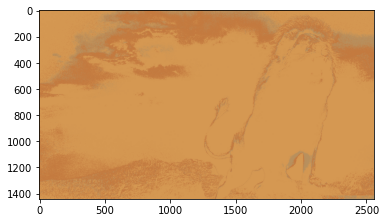

In [17]:
plt.imshow(OneImage(img,3,img_height, img_width, 'in_pixels'))